<a href="https://colab.research.google.com/github/lchoudhu-tibco/machine-learning-pub/blob/main/M3_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [3]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

replace FullIJCNN2013/00000.ppm? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Import Required packages

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.callbacks import EarlyStopping

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [10]:
# YOUR CODE HERE
!pip install Pillow



In [11]:
import os
from PIL import Image

images=[]
labels=[]
with os.scandir('/content/FullIJCNN2013/') as entries:
    for entry in entries:
        if entry.is_dir():
            files = os.listdir(f'/content/FullIJCNN2013/{entry.name}')
            #print(f'directory - {entry.name}')
            for file in files:
                labels.append(entry.name)
                file_name = f'/content/FullIJCNN2013/{entry.name}/{file}'
                img = Image.open(file_name)
                img = img.resize((30, 30))  # Resize image to (30, 30)
                img_array = np.array(img).flatten()  # Convert to 1-D array
                images.append(img_array)


image_arr = np.array(images)
print(image_arr.shape)
classes = np.array(labels, dtype='float')
print(classes.shape)



(1213, 2700)
(1213,)


In [8]:
#Test set
import os
from PIL import Image

images = []
with os.scandir('/content/FullIJCNN2013/') as entries:
    for entry in entries:
        if entry.is_file() and entry.name.endswith('.ppm'):
            file_name = f'/content/FullIJCNN2013/{entry.name}'
            img = Image.open(file_name)
            img = img.resize((30, 30))  # Resize image to (30, 30)
            img_array = np.array(img).flatten()  # Convert to 1-D array
            images.append(img_array)
image_test_arr = np.array(images)
print(image_test_arr.shape)

(900, 2700)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

In [ ]:
# YOUR CODE HERE



#### Plot the distribution of Classes

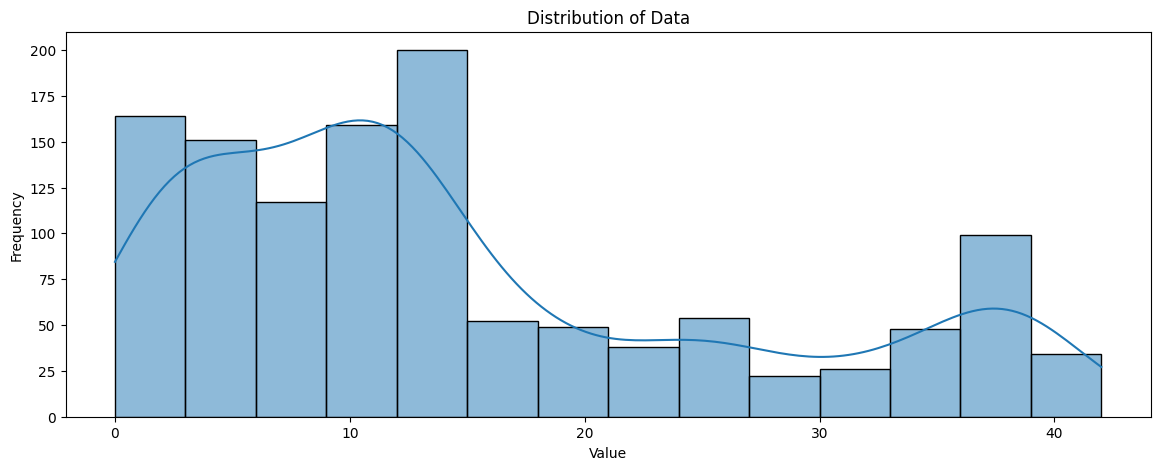

In [12]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
sns.histplot(np.sort(classes), kde=True,)
plt.title("Distribution of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [13]:
# YOUR CODE HERE
image_arr = image_arr/255

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [45]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(image_arr, classes, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
uniq_y = np.unique(y_train)

(970, 2700)
(970,)
(243, 2700)
(243,)
(873, 2700)
(873,)
(97, 2700)
(97,)


In [46]:
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(30, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(43, activation="softmax"))

model.summary()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", metrics=["accuracy"])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 2700)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 30)                  │          81,030 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 43)                  │           4,343 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,473 (345.60 KB)

 Trainable params: 88,473 (345.60 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(X_train, y_train, batch_size=100, epochs=30, validation_data = (X_valid, y_valid))


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0202 - loss: 3.7396 - val_accuracy: 0.0309 - val_loss: 3.6929
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0529 - loss: 3.6733 - val_accuracy: 0.0619 - val_loss: 3.6489
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1024 - loss: 3.6033 - val_accuracy: 0.0722 - val_loss: 3.6050
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1184 - loss: 3.5510 - val_accuracy: 0.0412 - val_loss: 3.5836
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1261 - loss: 3.5239 - val_accuracy: 0.0619 - val_loss: 3.5536
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1360 - loss: 3.4732 - val_accuracy: 0.0722 - val_loss: 3.5341
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1659 - loss: 3.4474 - val_accuracy: 0.0722 - val_loss: 3.5169
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1661 - loss: 3.3764 - val_accuracy: 0.0722 - val_loss: 3.5001


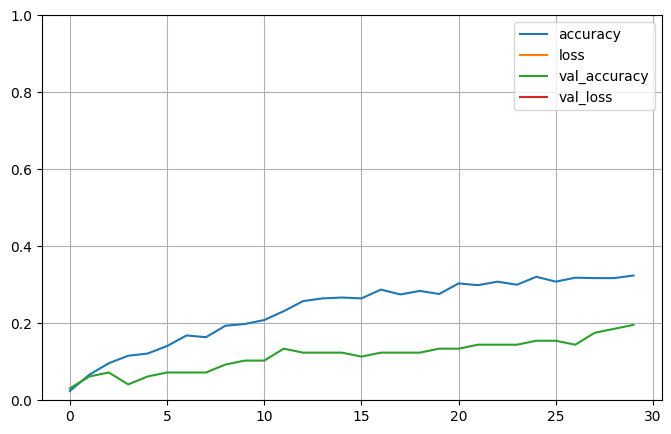

In [48]:
# Visualize training and validation metrics
df = pd.DataFrame(history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
# set the vertical range to [0-1]
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
# Model performance on test set
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2562 - loss: 3.0388 


[3.0141661167144775, 0.27572017908096313]

In [50]:
# Predict class probabilities for first three instances of X_test
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0.01, 0.12, 0.08, 0.02, 0.05, 0.05, 0.01, 0.03, 0.04, 0.03, 0.07,
        0.03, 0.05, 0.05, 0.03, 0.02, 0.01, 0.01, 0.03, 0.01, 0.01, 0.01,
        0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.01,
        0.01, 0.01, 0.02, 0.01, 0.  , 0.04, 0.01, 0.02, 0.01, 0.01],
       [0.01, 0.08, 0.09, 0.02, 0.06, 0.05, 0.01, 0.02, 0.04, 0.05, 0.09,
        0.03, 0.08, 0.03, 0.02, 0.02, 0.01, 0.02, 0.03, 0.01, 0.02, 0.01,
        0.01, 0.02, 0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.01,
        0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01],
       [0.02, 0.03, 0.03, 0.02, 0.04, 0.03, 0.01, 0.02, 0.03, 0.03, 0.04,
        0.03, 0.03, 0.05, 0.02, 0.02, 0.02, 0.02, 0.04, 0.02, 0.02, 0.02,
        0.01, 0.03, 0.01, 0.03, 0.02, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01,
        0.02, 0.01, 0.03, 0.02, 0.02, 0.04, 0.02, 0.02, 0.02, 0.01]],
      dtype=float32)

In [57]:
!pip install -q -U keras-tuner
import keras_tuner as kt
from scipy.stats import reciprocal

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [97]:
# YOUR CODE HERE
from keras import layers

def build_model(hp):
  model = Sequential()
  for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=25, max_value=100, step=5),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
        model.add(BatchNormalization())
  model.add(Dense(43, activation="softmax"))
  model.compile(loss='sparse_categorical_crossentropy',optimizer="adam", metrics=["accuracy"])
  return model


In [109]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
tuner = kt.RandomSearch(build_model, objective=kt.Objective('val_accuracy', 'max'), max_trials=50)
tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))



Trial 50 Complete [00h 00m 12s]
val_accuracy: 0.6804123520851135

Best val_accuracy So Far: 0.7628865838050842
Total elapsed time: 00h 10m 27s


In [106]:
best_model = tuner.get_best_models()[0]
best_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 90)                  │         243,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 90)                  │             360 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           3,913 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,363 (966.26 KB)

 Trainable params: 247,183 (965.56 KB)

 Non-trainable params: 180 (720.00 B)

#### Try the different algorithms and compare the results with MLP classifier

In [107]:
# YOUR CODE HERE
best_model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7336 - loss: 1.0529  


[1.0450807809829712, 0.7448559403419495]

### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE

In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE

In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# YOUR CODE HERE

#### Experiment using Dropout, Regularization and Batch Normalization

In [ ]:
# YOUR CODE HERE

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.